Andrew Welling
CS337
Project 8

# Testing for reference string generation

In [2]:
import reference_string as ref_gen
ref = ref_gen.Reference_String()
print(ref.generate_local(20)) # generate local reference string with len 20
print(ref.generate_nonlocal(20)) # generate nonlocal reference string with len 20

[0, 1, 1, 1, 2, 5, 4, 7, 8, 11, 7, 13, 9, 15, 11, 13, 14, 19, 17, 19]
[1, 1, 13, 18, 6, 20, 9, 0, 3, 7, 4, 14, 16, 14, 7, 20, 19, 3, 12, 9]


Since the local generation follows a generally increasing pattern, it is correct. Nonlocal uses random values instead. Each has the identified 20 elements, so both generations work properly.

# Testing all 3 simulation classes

In [6]:
import page_replacement as page_replacement

simulation = page_replacement.Page_Replacement(f_size=5) # calling the constructor generates a reference string
# it also lets you set the frame size, length of string, and whether it should be local or not
# defaults: ref length is 10, local is false

faults = simulation.optimal() # returns the num of page faults using the ref string generated in constructor
print(f"FIFO: {faults}")

FIFO: 8


In [3]:
faults = simulation.LRU() # uses the same ref string
print(f"LRU: {faults}")

LRU: 94


In [4]:
faults = simulation.optimal() # uses the same ref string
print(f"Optimal: {faults}")

Optimal: 78


# All 3 simulations ran 5 times with a local reference string and default reference string length of 100

In [1]:
fifo_faults = []
lru_faults = []
opt_faults = []
for _ in range(5):
    sim = page_replacement.Page_Replacement(f_size=5,local=True)
    fifo_faults.append(sim.FIFO())
    lru_faults.append(sim.LRU())
    opt_faults.append(sim.optimal())

print(fifo_faults)
print(lru_faults)
print(opt_faults)

NameError: name 'page_replacement' is not defined

Plotting the above

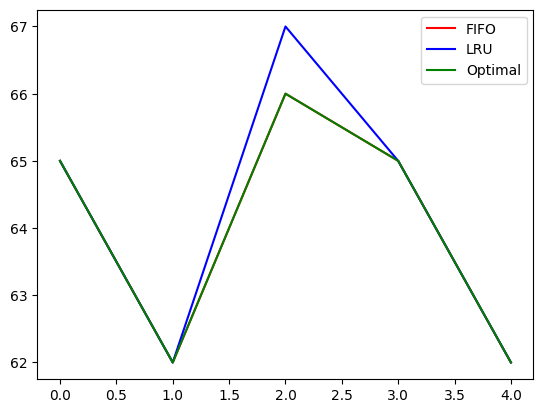

In [6]:
import matplotlib.pyplot as plt

plt.plot(fifo_faults,c="r")
plt.plot(lru_faults,c="b")
plt.plot(opt_faults,c="g")
plt.legend(["FIFO", "LRU","Optimal"])
plt.show()

Without locality:

In [7]:
for _ in range(5):
    sim = page_replacement.Page_Replacement(f_size=5,local=False)
    fifo_faults.append(sim.FIFO())
    lru_faults.append(sim.LRU())
    opt_faults.append(sim.optimal())

print(fifo_faults[5:])
print(lru_faults[5:])
print(opt_faults[5:])

[93, 98, 95, 95, 94]
[94, 98, 95, 95, 94]
[79, 80, 75, 80, 78]


# Comparison plot of local reference strings vs nonlocal

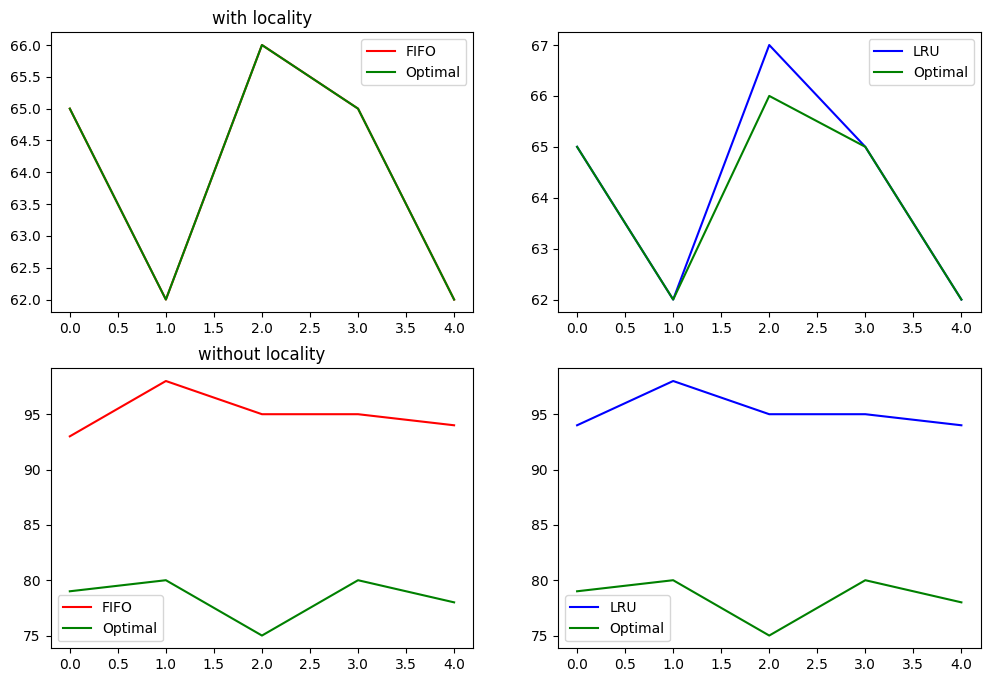

In [8]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
axes[0,0].plot(fifo_faults[:5],c="r")
axes[0,1].plot(lru_faults[:5],c="b")
axes[0,0].plot(opt_faults[:5],c="g")
axes[0,1].plot(opt_faults[:5],c="g")
axes[0,0].set_title('with locality')

axes[0,0].legend(["FIFO","Optimal"])
axes[0,1].legend(["LRU","Optimal"])

axes[1,0].plot(fifo_faults[5:],c="r")
axes[1,1].plot(lru_faults[5:],c="b")

axes[1,0].plot(opt_faults[5:],c="g")
axes[1,1].plot(opt_faults[5:],c="g")
axes[1,0].set_title('without locality')

axes[1,0].legend(["FIFO","Optimal"])
axes[1,1].legend(["LRU","Optimal"])
plt.show()

# Extensions

For my extensions, I compared the quality of the 3 previous page algorithms to least frequently used (LFU), most frequently used (MFU), and my own that I call inc dec that increments or decrements a counter for each page if it's used or not used.

# All 3 new algorithms compared to the 3 previous with locality

In [13]:
import replacement_extensions
mfu_faults = []
lfu_faults = []
incdec_faults = []
opt_faults = []
fifo_faults = []
lru_faults = []
samples = 5
for _ in range(samples):
    sim = replacement_extensions.Replacement_Extensions(f_size=5,local=True)
    mfu_faults.append(sim.MFU())
    lfu_faults.append(sim.LFU())
    incdec_faults.append(sim.inc_dec())
    fifo_faults.append(sim.FIFO())
    lru_faults.append(sim.LRU())
    opt_faults.append(sim.optimal())

# Now without locality

In [15]:
for _ in range(samples):
    sim = replacement_extensions.Replacement_Extensions(f_size=5,local=False)
    mfu_faults.append(sim.MFU())
    lfu_faults.append(sim.LFU())
    incdec_faults.append(sim.inc_dec())
    fifo_faults.append(sim.FIFO())
    lru_faults.append(sim.LRU())
    opt_faults.append(sim.optimal())

# Plotting the new results

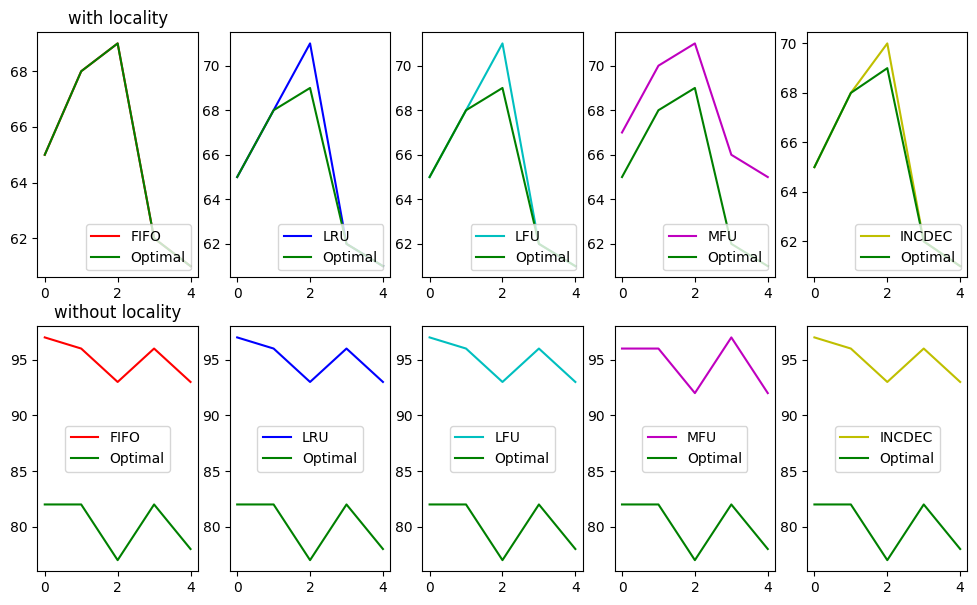

In [21]:
fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(12,7))

# plotting w locality
axes[0,0].plot(fifo_faults[:samples],c="r")
axes[0,1].plot(lru_faults[:samples],c="b")
axes[0,2].plot(lru_faults[:samples],c="c")
axes[0,3].plot(mfu_faults[:samples],c="m")
axes[0,4].plot(incdec_faults[:samples],c="y")

axes[0,0].plot(opt_faults[:samples],c="g")
axes[0,1].plot(opt_faults[:samples],c="g")
axes[0,2].plot(opt_faults[:samples],c="g")
axes[0,3].plot(opt_faults[:samples],c="g")
axes[0,4].plot(opt_faults[:samples],c="g")
axes[0,0].set_title('with locality')

axes[0,0].legend(["FIFO","Optimal"],loc='lower right')
axes[0,1].legend(["LRU","Optimal"],loc='lower right')
axes[0,2].legend(["LFU","Optimal"],loc='lower right')
axes[0,3].legend(["MFU","Optimal"],loc='lower right')
axes[0,4].legend(["INCDEC","Optimal"],loc='lower right')

# plotting without locality
axes[1,0].plot(fifo_faults[samples:],c="r")
axes[1,1].plot(lru_faults[samples:],c="b")
axes[1,2].plot(lru_faults[samples:],c="c")
axes[1,3].plot(mfu_faults[samples:],c="m")
axes[1,4].plot(incdec_faults[samples:],c="y")

axes[1,0].plot(opt_faults[samples:],c="g")
axes[1,1].plot(opt_faults[samples:],c="g")
axes[1,2].plot(opt_faults[samples:],c="g")
axes[1,3].plot(opt_faults[samples:],c="g")
axes[1,4].plot(opt_faults[samples:],c="g")
axes[1,0].set_title('without locality')

axes[1,0].legend(["FIFO","Optimal"],loc='center')
axes[1,1].legend(["LRU","Optimal"],loc='center')
axes[1,2].legend(["LFU","Optimal"],loc='center')
axes[1,3].legend(["MFU","Optimal"],loc='center')
axes[1,4].legend(["INCDEC","Optimal"],loc='center')
plt.show()